In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading dataset

df = pd.read_excel(r'C:\Users\shoum\Downloads\iris.xls')

In [3]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis

In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#Classification column is target and rest is features

In [8]:
df['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [9]:
#Checking for any zeros in data

(df == 0).sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [10]:
#no zero values

In [11]:
# Checking for duplicate rows

df[df.duplicated()]

,SL,SW,PL,PW,Classification
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [12]:
df = df.drop_duplicates()

In [13]:
df.shape

(147, 5)

In [14]:
# 3 duplicate rows removed

# Handling missing values

In [15]:
#Checking missing values

df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [16]:
#we have no missing values

# Managing Outliers

<AxesSubplot:>

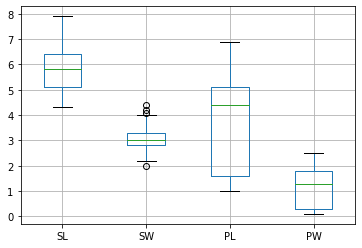

In [17]:
#outlier detection

df.boxplot()

In [18]:
#we have some outliers in SW

C:\Users\shoum\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SW'>

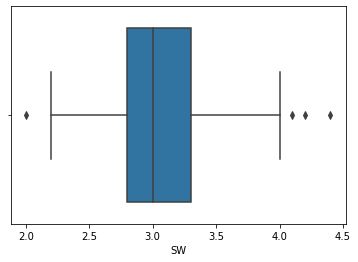

In [19]:
sns.boxplot(df['SW'])

In [20]:
!pip install feature_engine

In [21]:
#Replacing the outliers 

from feature_engine.outliers import Winsorizer
winsor=Winsorizer(capping_method='quantiles',tail='both',fold=0.05,variables=['SW'])
df['SW']=winsor.fit_transform(df[['SW']])

C:\Users\shoum\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SW'>

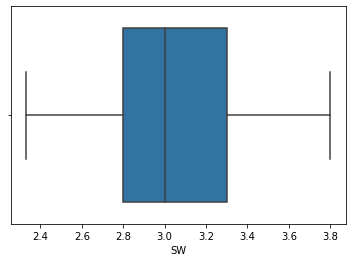

In [22]:
sns.boxplot(df['SW'])

In [23]:
# Replaced all outliers 

In [24]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Splitting data into features and target

In [25]:
X = df.drop('Classification', axis=1)
y = df['Classification']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                    random_state=42)     

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logit_model = LogisticRegression()
logit_model = logit_model.fit(X_train, y_train)
y_pred_logit = logit_model.predict(X_test)

C:\Users\shoum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(y_test, y_pred_logit)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  8]], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test, y_pred_logit)

0.9333333333333333

# KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
#steps to find optimum value for k 


metric_k = []
neighbors = range(3, 18)  
# it will take the values from 3 to 17

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(X_train, y_train)
    y_pred_kNN = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred_kNN)
    metric_k.append(acc)
    

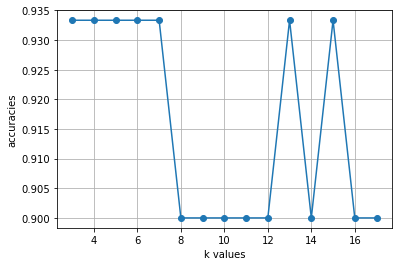

In [36]:
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('k values')
plt.ylabel('accuracies')
plt.grid()

In [37]:
#from this graph we can identify which k value is giving highest accuracy

# taking k value as 5

In [38]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier = classifier.fit(X_train, y_train)
y_pred_kNN = classifier.predict(X_test)

In [39]:
accuracy_score(y_test, y_pred_kNN)

0.9333333333333333

# SVM

In [40]:
from sklearn.svm import SVC

In [41]:
### Linear Kernal or Linear SVM

clf_svm = SVC(kernel='linear')
clf_svm = clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [43]:
confusion_matrix(y_test, y_pred_svm)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]], dtype=int64)

In [44]:
accuracy_score(y_test, y_pred_svm)

0.9666666666666667

In [45]:
### rbf Kernal

clf_svm2 = SVC(kernel='rbf')
clf_svm2 = clf_svm2.fit(X_train, y_train)
y_pred_svm2 = clf_svm2.predict(X_test)

In [46]:
confusion_matrix(y_test, y_pred_svm2)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  8]], dtype=int64)

In [47]:
accuracy_score(y_test, y_pred_svm2)

0.9333333333333333

# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

In [50]:
confusion_matrix(y_test, y_pred_dt)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  8]], dtype=int64)

In [51]:
accuracy_score(y_test, y_pred_dt)

0.9333333333333333

# Random Forest Algorithm

In [52]:

from sklearn.ensemble import RandomForestClassifier

In [53]:
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [54]:
confusion_matrix(y_test, y_pred_rf)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  8]], dtype=int64)

In [55]:
accuracy_score(y_test, y_pred_rf)

0.9333333333333333

# Pickle file creation

In [ ]:
#Linear SVM is the best model as we got highest accuracy 96%

In [56]:
#training the Linear SVM model with all data points

lsvm = SVC(kernel='linear')
lsvm = lsvm.fit(X,y)


In [57]:
import pickle

In [58]:
pickle.dump(lsvm,open("iris_svm_model.pkl","wb"))

In [ ]:
#Created pickle file 